In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns
from scipy.optimize import fsolve
from sympy import Eq, Symbol, solve
from scipy import stats
import xlrd
from scipy import signal
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rc, rcParams
%matplotlib inline

# Event 1

In [2]:
df1=pd.read_excel("2003Nov20.xlsx")
df1.replace([9999999,99999.9,9999.99,999.99,99.99,99999],np.nan,inplace=True)


nan_rows = df1[df1.isnull().any(1)]
nan_rows

,Year,Day,Hour,Min,Bz,Vsw,Nsw,Psw,AE,SYM-H
9,2003,324,0,9,1.33,NaN,NaN,NaN,31,0
17,2003,324,0,17,-2.52,NaN,NaN,NaN,33,-1
25,2003,324,0,25,0.06,NaN,NaN,NaN,35,-2
41,2003,324,0,41,-0.52,NaN,NaN,NaN,34,-2
52,2003,324,0,52,NaN,443.2,4.56,1.79,40,-3
...,...,...,...,...,...,...,...,...,...,...
1305,2003,324,21,45,-16.79,NaN,NaN,NaN,1022,-390
1314,2003,324,21,54,-14.62,NaN,NaN,NaN,1057,-388
1324,2003,324,22,4,NaN,NaN,NaN,NaN,495,-398
1325,2003,324,22,5,NaN,NaN,NaN,NaN,490,-398


In [3]:
df1.to_csv("2003-11-20.csv",index=False)

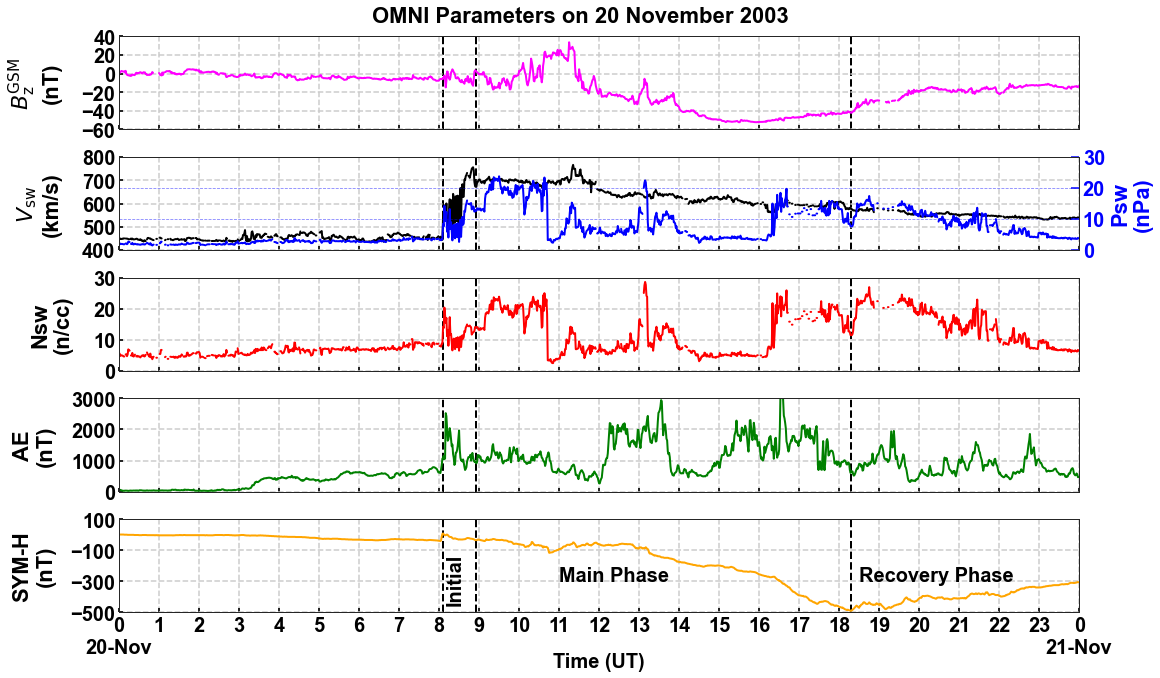

In [59]:

df2=df1[["Bz","Vsw","Nsw","AE","SYM-H"]]
df2.columns=["bz","vsw","nsw","ae","sym"]

rc('font', weight='bold')
rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']


import warnings
warnings.filterwarnings("ignore")
sns.set_style(style="ticks")
sns.set_context("paper",font_scale=1.5, rc={"lines.linewidth": 2})


fig, axs = plt.subplots(5, sharex=True, 
                        gridspec_kw={'hspace': 0.2},constrained_layout=True,
                        figsize=(16,9))
fig.suptitle('OMNI Parameters on 20 November 2003',color="black",
            x=0.5,y=1.03,fontsize=22,fontweight="bold")
tick=np.arange(0,1440+60,60)
color=["yellow","white",'black']
colors=["magenta","black","red","green","orange"]
#hourly_ticks =  30 * np.arange(48)
cc=['$B_{\\rmz}^{\\rmGSM}$\n(nT)',
    '$V_{\\rmsw}$\n(km/s)','Nsw\n(n/cc)','AE\n(nT)','SYM-H\n(nT)'] 
for i,c in enumerate(df2.columns):
    axs[i].plot(df2.index, df2[c],color=colors[i],alpha=1.0)
    #axs[i].plot(df1.index, df1[c],color="black",alpha=1.0,label="1-Min data")
    #if i==0:
        #axs[i].plot(hourly_ticks,x["bz"],color="red",alpha=1.0)
        #axs[i].plot(hourly_ticks,x["bz"],color="red",alpha=1.0,label="30-Min Average")
    #if i==4:
        #axs[i].plot(dfnew.rolling(30, center=True).mean()["sym"])
        #axs[i].plot(hourly_ticks,x["sym"],color="red",alpha=1.0)
    #axs[i].legend()
    if i==1:
        ax2=axs[i].twinx()
        p1,=ax2.plot(df1.index,df1["Psw"],linestyle="-",color="blue")
        tkw = dict(size=4, width=1.5)
        ax2.tick_params(axis='y', colors=p1.get_color(),labelsize=14, **tkw)
        ax2.set_ylim([0,30])
        ax2.set_yticks([0,10,20,30])
        ax2.yaxis.label.set_color(p1.get_color())
        ax2.set_ylabel("Psw\n(nPa)",fontsize=22,labelpad=5,fontweight="bold")
        ax2.tick_params(which='major', length=8,top=True, right=True,direction="in",labelsize=20)
        ax2.grid(axis="y",linestyle='--',color="blue",alpha=0.5)
    
    #ylabel management
    if i==0:
        axs[i].set_ylabel(cc[i],fontsize=22,labelpad=20,color=color[2],fontweight="bold")
    elif i==2:
        axs[i].set_ylabel(cc[i],fontsize=22,labelpad=20,color=color[2],fontweight="bold")
    elif i==1:
        axs[i].set_ylabel(cc[i],fontsize=22,labelpad=20,color=color[2],fontweight="bold")
    elif i==3:
        axs[i].set_ylabel(cc[i],fontsize=22,labelpad=15,color=color[2],fontweight="bold")
    else:   
        axs[i].set_ylabel(cc[i],fontsize=22,labelpad=15,color=color[2],fontweight="bold")
        
#grid
    axs[i].grid(axis="both",linestyle='--',linewidth=1.5)
    
#xlim
    axs[i].set_xlim([0,1440])
    
#xticks and xticks label
    axs[i].set_xticks(tick)
    #axs[i].set_xticklabels(["\n00:00\n03-Aug", "02:00", "04:00", "06:00","08:00", "10:00","12:00", 
     #                      "14:00", "16:00", "18:00", "20:00", "22:00", "\n00:00"],
      #                    rotation=0)
    axs[i].set_xticklabels(["0\n20-Nov", "1", "2", "3","4", "5","6", 
                           "7", "8", "9", "10", "11","12","13","14","15","16","17","18","19","20",
                            "21","22","23", "0\n21-Nov"],
                          rotation=0)
    #axs[i].set_xticklabels(np.arange(0,25))
    axs[i].set_xlabel('Time (UT)',fontsize=20,color=color[2],labelpad=-5,fontweight="bold")
    tkw = dict(size=6, width=2,labelcolor=color[2])
    axs[i].tick_params(axis='y', labelsize=20,**tkw,direction="in")
    axs[i].tick_params(axis='x',labelsize=20, **tkw,direction="in")
    

        
#
#ylim of each subplot
    if i==0:
        axs[i].set_ylim([-60,40])
        axs[i].set_yticks(np.arange(-60,60,20))
    
    if i==1:
        axs[i].set_ylim([400,800])
        axs[i].set_yticks(np.arange(400,900,100))
    if i==2:
        axs[i].set_ylim([0,30])
        axs[i].set_yticks(np.arange(0,40,10))
    if i==3:
        axs[i].set_ylim([0,3000])
        axs[i].set_yticks(np.arange(0,4000,1000))
    if i==4:
        axs[i].set_ylim([-500,100])
        axs[i].set_yticks(np.arange(-500,300,200))
        
        req=dict(size=20,color=color[2])
        axs[i].text(660,-300,"Main Phase",rotation=0,**req)
        axs[i].text(490,-430,"Initial",rotation=90,**req)
        axs[i].text(1110,-300,"Recovery Phase",rotation=0,**req)
        #axs[i].axhline(0)
    #axs.xaxis.set_minor_locator(AutoMinorLocator(6))
        
    axs[i].xaxis.set_minor_locator(MultipleLocator(60))
    axs[i].tick_params(which='major', length=4,labelcolor=color[2],direction="in")
    axs[i].tick_params(which='minor', length=4,labelcolor=color[2],direction="in")
    #axs[i].minorticks_on()
    for xc in [486,536,1097]:
            axs[i].axvline(x=xc,ymin=0,ymax=1,ls='--',color=color[2],linewidth=2,zorder=0, clip_on=False)
    
    
#label outer
for ax in axs:
    ax.label_outer()
    
#figure description   
fig.tight_layout(pad=2.0) 
fig.savefig("2003paper.png",dpi=300,bbox_inches='tight')



# Event 2

In [4]:
df=pd.read_excel("2015June22.xlsx")
df.replace([9999999,99999.9,9999.99,999.99,99.99,99999],np.nan,inplace=True)


nan_rows = df[df.isnull().any(1)]
nan_rows

,Year,Day,Hour,Min,Bz,Vsw,Nsw,Psw,AE,SYM-H
11,2015,173,0,11,-0.22,NaN,NaN,NaN,57,9
12,2015,173,0,12,-4.89,NaN,NaN,NaN,57,9
13,2015,173,0,13,-4.83,NaN,NaN,NaN,58,9
17,2015,173,0,17,-5.30,NaN,NaN,NaN,73,9
18,2015,173,0,18,-4.76,NaN,NaN,NaN,74,9
...,...,...,...,...,...,...,...,...,...,...
1292,2015,173,21,32,19.80,NaN,NaN,NaN,1404,-85
1300,2015,173,21,40,3.27,NaN,NaN,NaN,1012,-91
1301,2015,173,21,41,4.44,NaN,NaN,NaN,925,-93
1404,2015,173,23,24,9.27,NaN,NaN,NaN,292,-98


In [5]:
df.to_csv("2015-06-22.csv",index=False)

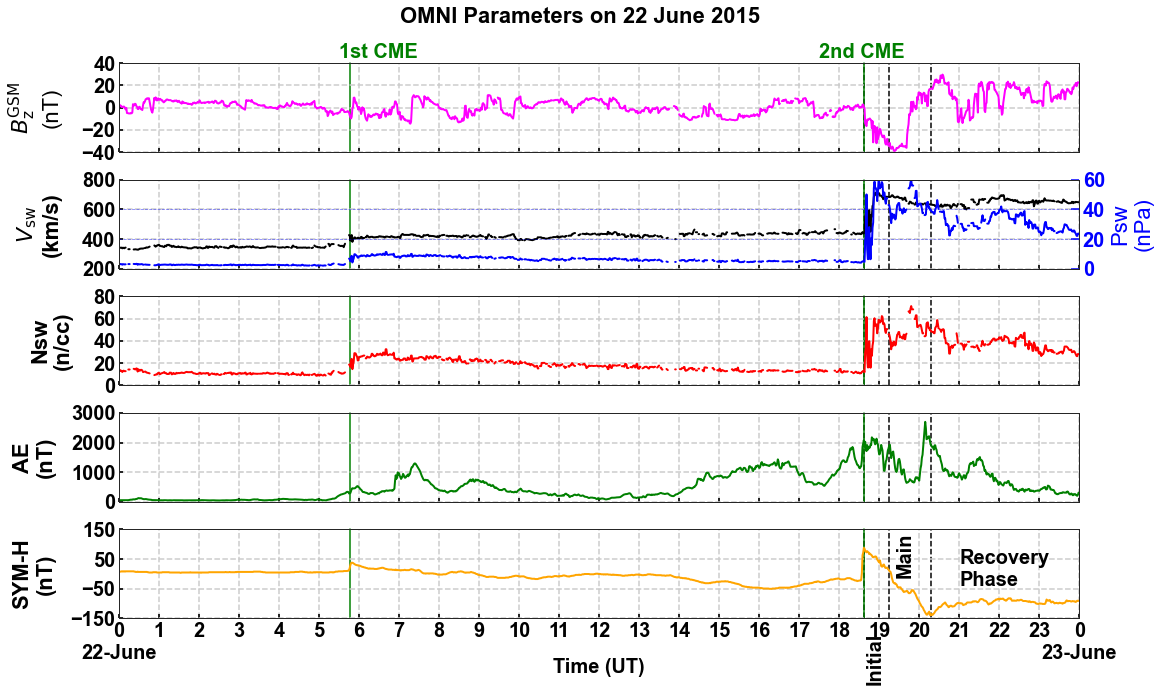

In [65]:

df3=df[["Bz","Vsw","Nsw","AE","SYM-H"]]
df3.columns=["bz","vsw","nsw","ae","sym"]



import warnings
warnings.filterwarnings("ignore")
sns.set_style(style="ticks")
sns.set_context("paper",font_scale=1.5, rc={"lines.linewidth": 2})
rc('font', weight='bold')
rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
fig, axs = plt.subplots(5, sharex=True, 
                        gridspec_kw={'hspace': 0.2},constrained_layout=True,
                        figsize=(16,9))
fig.suptitle('OMNI Parameters on 22 June 2015',color="black",
            x=0.5,y=1.05,fontsize=22,fontweight="bold")
tick=np.arange(0,1440+60,60)
color=["yellow","white","black"]
colors=["magenta","black","red","green","orange"]
#hourly_ticks =  30 * np.arange(48)
cc=['$B_{\\rmz}^{\\rmGSM}$\n(nT)',
    '$V_{\\rmsw}$\n(km/s)','Nsw\n(n/cc)','AE\n(nT)','SYM-H\n(nT)'] 
for i,c in enumerate(df3.columns):
    axs[i].plot(df3.index, df3[c],color=colors[i],alpha=1.0)
    #axs[i].plot(df1.index, df1[c],color="black",alpha=1.0,label="1-Min data")
    #if i==0:
        #axs[i].plot(hourly_ticks,x["bz"],color="red",alpha=1.0)
        #axs[i].plot(hourly_ticks,x["bz"],color="red",alpha=1.0,label="30-Min Average")
    #if i==4:
        #axs[i].plot(dfnew.rolling(30, center=True).mean()["sym"])
        #axs[i].plot(hourly_ticks,x["sym"],color="red",alpha=1.0)
    #axs[i].legend()
    if i==1:
        ax2=axs[i].twinx()
        p1,=ax2.plot(df3.index,df["Psw"],linestyle="-",color="blue")
        tkw = dict(size=4, width=1.5)
        ax2.tick_params(axis='y', colors=p1.get_color(),labelsize=14, **tkw)
        ax2.set_ylim([0,60])
        ax2.set_yticks(np.arange(0,80,20))
        ax2.yaxis.label.set_color(p1.get_color())
        ax2.set_ylabel("Psw\n(nPa)",fontsize=22,labelpad=5)
        ax2.tick_params(which='major', length=8,top=True, right=True,direction="in",labelsize=20)
        ax2.grid(axis="y",linestyle='--',color="blue",alpha=0.5)
    
    #ylabel management
    if i==0:
        axs[i].set_ylabel(cc[i],fontsize=22,labelpad=20,color=color[2])
        req=dict(size=20,color='green')
        axs[i].text(330,45,"1st CME",rotation=0,**req)
        axs[i].text(1050,45,"2nd CME",rotation=0,**req)
    elif i==2:
        axs[i].set_ylabel(cc[i],fontsize=22,labelpad=20,color=color[2],fontweight="bold")
    elif i==1:
        axs[i].set_ylabel(cc[i],fontsize=22,labelpad=20,color=color[2],fontweight="bold")
    elif i==3:
        axs[i].set_ylabel(cc[i],fontsize=22,labelpad=15,color=color[2],fontweight="bold")
    else:   
        axs[i].set_ylabel(cc[i],fontsize=22,labelpad=15,color=color[2],fontweight="bold")
        
#grid
    axs[i].grid(axis="both",linestyle='--',linewidth=1.5)
    
#xlim
    axs[i].set_xlim([0,1440])
    
#xticks and xticks label
    axs[i].set_xticks(tick)
    #axs[i].set_xticklabels(["\n00:00\n03-Aug", "02:00", "04:00", "06:00","08:00", "10:00","12:00", 
     #                      "14:00", "16:00", "18:00", "20:00", "22:00", "\n00:00"],
      #                    rotation=0)
    axs[i].set_xticklabels(["0\n22-June", "1", "2", "3","4", "5","6", 
                           "7", "8", "9", "10", "11","12","13","14","15","16","17","18","19","20",
                            "21","22","23", "0\n23-June"],
                          rotation=0)
    #axs[i].set_xticklabels(np.arange(0,25))
    axs[i].set_xlabel('Time (UT)',fontsize=20,color=color[2],labelpad=-5,fontweight="bold")
    tkw = dict(size=6, width=2,labelcolor=color[2])
    axs[i].tick_params(axis='y', labelsize=20,**tkw,direction="in")
    axs[i].tick_params(axis='x',labelsize=20, **tkw,direction="in")
    

        
#
#ylim of each subplot
    if i==0:
        axs[i].set_ylim([-40,40])
        axs[i].set_yticks(np.arange(-40,60,20))
    
    if i==1:
        axs[i].set_ylim([200,800])
        axs[i].set_yticks(np.arange(200,1000,200))
    if i==2:
        axs[i].set_ylim([0,80])
        axs[i].set_yticks(np.arange(0,100,20))
    if i==3:
        axs[i].set_ylim([0,3000])
        axs[i].set_yticks(np.arange(0,4000,1000))
    if i==4:
        axs[i].set_ylim([-150,100])
        axs[i].set_yticks(np.arange(-150,250,100))
        
        req=dict(size=20,color=color[2])
        axs[i].text(1165,0,"Main",rotation=90,**req)
        axs[i].text(1120,-360, "Initial",rotation=90,**req)
        axs[i].text(1260,-40,"Recovery\nPhase",rotation=0,**req)
        #axs[i].axhline(0)
    #axs.xaxis.set_minor_locator(AutoMinorLocator(6))
        
    axs[i].xaxis.set_minor_locator(MultipleLocator(60))
    axs[i].tick_params(which='major', length=4,labelcolor=color[2],direction="in")
    axs[i].tick_params(which='minor', length=4,labelcolor=color[2],direction="in")
    #axs[i].minorticks_on()
    for xc in [1117,1155,1217]:
            axs[i].axvline(x=xc,ymin=0,ymax=1,ls='--',color=color[2],linewidth=1.5,zorder=0, clip_on=False)
    
    axs[i].axvline(x=346,ymin=0,ymax=1,ls='-',color='green',linewidth=1.5,zorder=0, clip_on=False)
    axs[i].axvline(x=1117,ymin=0,ymax=1,ls='-',color='green',linewidth=1.5,zorder=0, clip_on=False)
    
        
        
    
    
#label outer
for ax in axs:
    ax.label_outer()
    
#figure description   
fig.tight_layout(pad=2.0) 
fig.savefig("2015paper.png",dpi=300,bbox_inches='tight')

